In [40]:
!pip install faker
!pip install delorean


import json
import calendar
import random
from datetime import date, timedelta
import faker
import numpy as np
from pandas import DataFrame
from delorean import parse
import pandas as pd
from dateutil import parser #Group 12: Used to fix Issue 2

# make the graphs nicer
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# see all available with: print(plt.style.available)


#Group 12: Steven Cai, Joann Mei, Kevin Li, Mehak Chohan, Nafisa Kibria  
#Group 12: All group 12 notes are preceded by GROUP 12

#Issue 1: Budget is not correct, in the format of "AKX_20231121_20240612_20-30_M_USD", which is actually cmp_name
#Issue 2: Duration is not correct, an issue with parsing results in negative dates
#Issue 3: Code for data aggregation is not working, error with nesting
#Issue 4: Weekdays out of order in line graph


In [41]:
# create the faker to populate the data
fake = faker.Faker()

In [42]:
usernames = set()
usernames_no = 1000

# Generate random names to create 1000 people
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

In [43]:
#assigning gender and user firstname last name
def get_random_name_and_gender():
    skew = .6  # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'

    
get_random_name_and_gender()


('Antonio Price', 'M')

In [44]:
#Create a list of JSON users

# for each username, create a complete user profile
# simulate user data coming from an API. It is a list
# of JSON strings (users).
def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90),
            'address': fake.address(),
        }
        users.append(json.dumps(user))
    return users

users = get_users(usernames)
users[0:3]

['{"username": "mathewswilliam", "name": "Seth Greer", "gender": "M", "email": "joanneromero@example.org", "age": 34, "address": "909 Paul Circles\\nAndersonland, MS 26634"}',
 '{"username": "reevesleah", "name": "Michael Pruitt", "gender": "M", "email": "paul24@example.org", "age": 45, "address": "043 Angela Harbor Suite 039\\nNew Nancy, MO 57269"}',
 '{"username": "charles84", "name": "Douglas Nunez", "gender": "M", "email": "millershannon@example.org", "age": 54, "address": "8854 Soto Greens\\nJameschester, NE 70746"}']

In [45]:

# campaign name format:
# InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    # just some gibberish internal codes
    types = ['AKX', 'BYU', 'GRZ', 'KTR']
    return random.choice(types)

#added notes
print(get_type())

#Start date must be before end dat
def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
     #GROUP 12: Negative offset means starts in future, positve means started already
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    
    return _format_date(start), _format_date(end)



#GROUP 12, Issue 2: Error isn't above, math is correct and was tested. No start dates are created after end dates


#age minus's age's remainder of 5 to round down on age
def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    return '{}-{}'.format(age, age + diff)


#get gender, currency, campaign name 

def get_gender():
    return random.choice(('M', 'F', 'B'))

print(get_gender())



def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

print(get_currency())

def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join(
        (type_, start_end, age, gender, currency))

#for x in range(100):
#    print(get_campaign_name())

AKX
F
USD


In [46]:
# campaign data:
# name, budget, spent, clicks, impressions
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)    
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))    
    impressions = int(random.gauss(0.5 * 10**6, 2))
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

In [47]:
# assemble the logic to get the final version of the rough data
# data will be a list of dictionaries. Each dictionary will follow
# this structure:
# {'user': user_json, 'campaigns': [c1, c2, ...]}
# where user_json is the JSON string version of a user data dict
# and c1, c2, ... are campaign dicts as returned by
# get_campaign_data

def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data()
                     for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data



In [48]:
#2 Cleaning the Data
# fetch simulated rough data
rough_data = get_data(users)

rough_data[:2]  # let's take a peek

[{'user': '{"username": "mathewswilliam", "name": "Seth Greer", "gender": "M", "email": "joanneromero@example.org", "age": 34, "address": "909 Paul Circles\\nAndersonland, MS 26634"}',
  'campaigns': [{'cmp_name': 'KTR_20230828_20230928_30-40_M_USD',
    'cmp_bgt': 819011,
    'cmp_spent': 196388,
    'cmp_clicks': 58160,
    'cmp_impr': 500001},
   {'cmp_name': 'AKX_20230130_20230214_40-55_M_EUR',
    'cmp_bgt': 355217,
    'cmp_spent': 42627,
    'cmp_clicks': 57312,
    'cmp_impr': 500001}]},
 {'user': '{"username": "reevesleah", "name": "Michael Pruitt", "gender": "M", "email": "paul24@example.org", "age": 45, "address": "043 Angela Harbor Suite 039\\nNew Nancy, MO 57269"}',
  'campaigns': [{'cmp_name': 'AKX_20220519_20221226_30-40_M_GBP',
    'cmp_bgt': 898373,
    'cmp_spent': 812401,
    'cmp_clicks': 39625,
    'cmp_impr': 499999},
   {'cmp_name': 'GRZ_20230426_20240710_30-45_M_EUR',
    'cmp_bgt': 145155,
    'cmp_spent': 47772,
    'cmp_clicks': 83660,
    'cmp_impr': 500001}

In [49]:
# Let's start from having a different version of the data
# I want a list whose items will be dicts. Each dict is 
# the original campaign dict plus the user JSON

data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2]  # let's take another peek

[{'cmp_name': 'KTR_20230828_20230928_30-40_M_USD',
  'cmp_bgt': 819011,
  'cmp_spent': 196388,
  'cmp_clicks': 58160,
  'cmp_impr': 500001,
  'user': '{"username": "mathewswilliam", "name": "Seth Greer", "gender": "M", "email": "joanneromero@example.org", "age": 34, "address": "909 Paul Circles\\nAndersonland, MS 26634"}'},
 {'cmp_name': 'AKX_20230130_20230214_40-55_M_EUR',
  'cmp_bgt': 355217,
  'cmp_spent': 42627,
  'cmp_clicks': 57312,
  'cmp_impr': 500001,
  'user': '{"username": "mathewswilliam", "name": "Seth Greer", "gender": "M", "email": "joanneromero@example.org", "age": 34, "address": "909 Paul Circles\\nAndersonland, MS 26634"}'}]

In [50]:
#Creating the dataframe

# data is good enough for creating an initial DataFrame
df = DataFrame(data)

# let's take a peek at the first 5 rows, to make sure
# nothing weird has happened
df.head()



,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
0,KTR_20230828_20230928_30-40_M_USD,819011,196388,58160,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G..."
1,AKX_20230130_20230214_40-55_M_EUR,355217,42627,57312,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G..."
2,AKX_20220519_20221226_30-40_M_GBP,898373,812401,39625,499999,"{""username"": ""reevesleah"", ""name"": ""Michael Pr..."
3,GRZ_20230426_20240710_30-45_M_EUR,145155,47772,83660,500001,"{""username"": ""reevesleah"", ""name"": ""Michael Pr..."
4,AKX_20221117_20230103_30-40_F_EUR,844979,507246,19342,500003,"{""username"": ""reevesleah"", ""name"": ""Michael Pr..."


In [51]:
# OK! DataFrame is alive and well!
# let's get a sense of how many rows there are and what is
# their structure.
df.count()

cmp_name      5048
cmp_bgt       5048
cmp_spent     5048
cmp_clicks    5048
cmp_impr      5048
user          5048
dtype: int64

In [52]:
df.describe()

,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr
count,5048.000000,5048.000000,5048.000000,5048.000000
mean,500087.926109,248003.322900,39772.041799,499999.538035
std,288306.124559,217164.889074,21247.761483,2.006661
min,1894.000000,102.000000,347.000000,499993.000000
25%,252346.500000,66105.250000,22622.750000,499998.000000
50%,503519.500000,190661.500000,36760.000000,500000.000000
75%,749933.250000,375524.250000,54911.750000,500001.000000
max,999764.000000,979792.000000,98679.000000,500006.000000


In [53]:
# let's see which are the top and bottom 3 campaigns according
# to budget (regardless of the currency)
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
1999,GRZ_20230219_20230725_25-45_F_USD,999764,251203,40466,499999,"{""username"": ""knguyen"", ""name"": ""Denise Greene..."
4643,GRZ_20230623_20230903_25-30_B_GBP,999751,553529,9949,499998,"{""username"": ""carlsonshelly"", ""name"": ""Tracy Y..."
2544,GRZ_20231015_20231116_25-45_F_EUR,999724,273244,21161,500000,"{""username"": ""leedavid"", ""name"": ""Joshua Larso..."


In [54]:
df.sort_values(by=['cmp_bgt'], ascending=False).tail(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
486,KTR_20230504_20240119_25-35_B_GBP,2078,1581,40992,500001,"{""username"": ""gail34"", ""name"": ""Austin Carroll..."
1625,GRZ_20230923_20231226_25-45_B_USD,1900,1860,23485,500001,"{""username"": ""brentrios"", ""name"": ""Lauren Nels..."
2800,KTR_20230715_20240710_40-65_F_GBP,1894,1091,31897,499998,"{""username"": ""vmartin"", ""name"": ""Olivia Jackso..."


In [55]:
#3 - Manipulating the DataFrame
# first, let's explode cmp_name into its components
# and get a separate DataFrame for those

#Group 12: cmp_name is a string filled with the type, date and more all mixed together
#Group 12: cmp_name needs to be unpacked

#Group 12: Issue 2: Negative duration is fixed here by changing the parsing method to use parser instead.

def unpack_campaign_name(name):
    type_, start, end, age, gender, currency = name.split('_')
    start = parser.parse(start)
    end = parser.parse(end)
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,KTR,2023-08-28,2023-09-28,30-40,M,USD
1,AKX,2023-01-30,2023-02-14,40-55,M,EUR
2,AKX,2022-05-19,2022-12-26,30-40,M,GBP


In [56]:
# let's join the two dataframes
df = df.join(campaign_df)
df.head()
#Group 12: Issue 1: Budget is correct here

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user,Type,Start,End,Age,Gender,Currency
0,KTR_20230828_20230928_30-40_M_USD,819011,196388,58160,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",KTR,2023-08-28,2023-09-28,30-40,M,USD
1,AKX_20230130_20230214_40-55_M_EUR,355217,42627,57312,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",AKX,2023-01-30,2023-02-14,40-55,M,EUR
2,AKX_20220519_20221226_30-40_M_GBP,898373,812401,39625,499999,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-05-19,2022-12-26,30-40,M,GBP
3,GRZ_20230426_20240710_30-45_M_EUR,145155,47772,83660,500001,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",GRZ,2023-04-26,2024-07-10,30-45,M,EUR
4,AKX_20221117_20230103_30-40_F_EUR,844979,507246,19342,500003,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-11-17,2023-01-03,30-40,F,EUR


In [57]:
# and take a peek: good! We didn't screw up!
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,KTR_20230828_20230928_30-40_M_USD,KTR,2023-08-28,2023-09-28,30-40,M,USD
1,AKX_20230130_20230214_40-55_M_EUR,AKX,2023-01-30,2023-02-14,40-55,M,EUR
2,AKX_20220519_20221226_30-40_M_GBP,AKX,2022-05-19,2022-12-26,30-40,M,GBP


In [58]:
# now let's do the same for the JSON user object

def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return [
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]

user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(
    user_data.tolist(), columns=user_cols, index=df.index)

In [59]:
# let's join the two dataframes
df = df.join(user_df)

In [60]:
# and take a peek: good! Also this time we didn't screw up!
df[['user'] + user_cols].head(2)
df.head()
#Group 12: Issue 1: Budget is correct here

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user,Type,Start,End,Age,Gender,Currency,username,email,name,gender,age,address
0,KTR_20230828_20230928_30-40_M_USD,819011,196388,58160,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",KTR,2023-08-28,2023-09-28,30-40,M,USD,mathewswilliam,joanneromero@example.org,Seth Greer,M,34,"909 Paul Circles\nAndersonland, MS 26634"
1,AKX_20230130_20230214_40-55_M_EUR,355217,42627,57312,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",AKX,2023-01-30,2023-02-14,40-55,M,EUR,mathewswilliam,joanneromero@example.org,Seth Greer,M,34,"909 Paul Circles\nAndersonland, MS 26634"
2,AKX_20220519_20221226_30-40_M_GBP,898373,812401,39625,499999,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-05-19,2022-12-26,30-40,M,GBP,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
3,GRZ_20230426_20240710_30-45_M_EUR,145155,47772,83660,500001,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",GRZ,2023-04-26,2024-07-10,30-45,M,EUR,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
4,AKX_20221117_20230103_30-40_F_EUR,844979,507246,19342,500003,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-11-17,2023-01-03,30-40,F,EUR,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"


In [61]:
#Group 12 - two column names are missing here leading leads to a length mismatch error

# now we have the DataFrame completely expanded, so it's
# time to play with it. First, let's fix those ugly column names
better_columns = [
    'cmp_name','Budget', 'Spent', 'Clicks', 'Impressions',
    'user',
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
print(df.columns)
df.columns = better_columns
print(df.columns)
df.head(50)


#Group 12: Issue 1: Budget is wrong. The order of the names for columns needs to be changed to fix

Index(['cmp_name', 'cmp_bgt', 'cmp_spent', 'cmp_clicks', 'cmp_impr', 'user',
       'Type', 'Start', 'End', 'Age', 'Gender', 'Currency', 'username',
       'email', 'name', 'gender', 'age', 'address'],
      dtype='object')
Index(['cmp_name', 'Budget', 'Spent', 'Clicks', 'Impressions', 'user', 'Type',
       'Start', 'End', 'Target Age', 'Target Gender', 'Currency', 'Username',
       'Email', 'Name', 'Gender', 'Age', 'Address'],
      dtype='object')


,cmp_name,Budget,Spent,Clicks,Impressions,user,Type,Start,End,Target Age,Target Gender,Currency,Username,Email,Name,Gender,Age,Address
0,KTR_20230828_20230928_30-40_M_USD,819011,196388,58160,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",KTR,2023-08-28,2023-09-28,30-40,M,USD,mathewswilliam,joanneromero@example.org,Seth Greer,M,34,"909 Paul Circles\nAndersonland, MS 26634"
1,AKX_20230130_20230214_40-55_M_EUR,355217,42627,57312,500001,"{""username"": ""mathewswilliam"", ""name"": ""Seth G...",AKX,2023-01-30,2023-02-14,40-55,M,EUR,mathewswilliam,joanneromero@example.org,Seth Greer,M,34,"909 Paul Circles\nAndersonland, MS 26634"
2,AKX_20220519_20221226_30-40_M_GBP,898373,812401,39625,499999,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-05-19,2022-12-26,30-40,M,GBP,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
3,GRZ_20230426_20240710_30-45_M_EUR,145155,47772,83660,500001,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",GRZ,2023-04-26,2024-07-10,30-45,M,EUR,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
4,AKX_20221117_20230103_30-40_F_EUR,844979,507246,19342,500003,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-11-17,2023-01-03,30-40,F,EUR,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
5,AKX_20220204_20220711_40-65_B_GBP,470554,211895,70034,499995,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-02-04,2022-07-11,40-65,B,GBP,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
6,AKX_20220524_20230118_30-35_M_GBP,972020,555761,83417,500005,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-05-24,2023-01-18,30-35,M,GBP,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
7,AKX_20220819_20221223_30-35_B_GBP,41520,39137,53066,499998,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",AKX,2022-08-19,2022-12-23,30-35,B,GBP,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
8,KTR_20220217_20221201_25-45_B_USD,420887,252803,80304,499997,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",KTR,2022-02-17,2022-12-01,25-45,B,USD,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"
9,KTR_20220702_20220810_20-40_B_USD,364135,266801,11663,499997,"{""username"": ""reevesleah"", ""name"": ""Michael Pr...",KTR,2022-07-02,2022-08-10,20-40,B,USD,reevesleah,paul24@example.org,Michael Pruitt,M,45,"043 Angela Harbor Suite 039\nNew Nancy, MO 57269"


In [62]:
# let's add three other columns

def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
    
calculate_extra_columns(df)

In [63]:
# let's take a peek
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,196388,58160,500001,0.116320,3.376685,0.392775
1,42627,57312,500001,0.114624,0.743771,0.085254
2,812401,39625,499999,0.079250,20.502233,1.624805


In [64]:
# let's take the values of the first row and verify
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]

CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]

print('CTR:', CTR, clicks / impressions)
print('CPC:', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.11631976736046527 0.11631976736046527
CPC: 3.376685006877579 3.376685006877579
CPI: 0.3927752144495711 0.3927752144495711


In [65]:
# let's also add the name of the Day when campaign starts
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)


In [66]:
# let's verify
df[['Start', 'End', 'Duration', 'Day of Week']].head()

,Start,End,Duration,Day of Week
0,2023-08-28,2023-09-28,31,Monday
1,2023-01-30,2023-02-14,15,Monday
2,2022-05-19,2022-12-26,221,Thursday
3,2023-04-26,2024-07-10,441,Wednesday
4,2022-11-17,2023-01-03,47,Thursday


In [67]:
# now let's get rid of the cmp_name and user columns,
# which we don't need any more, and address too
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]

#Group 12: Issue 1: using print() to test to see of column name match up

#print(df.columns)
df = df[final_columns]
#print(df.columns)

df

Index(['cmp_name', 'Budget', 'Spent', 'Clicks', 'Impressions', 'user', 'Type',
       'Start', 'End', 'Target Age', 'Target Gender', 'Currency', 'Username',
       'Email', 'Name', 'Gender', 'Age', 'Address', 'CTR', 'CPC', 'CPI',
       'Day of Week', 'Duration'],
      dtype='object')
Index(['Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget', 'Currency',
       'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC', 'CPI', 'Target Age',
       'Target Gender', 'Username', 'Email', 'Name', 'Gender', 'Age'],
      dtype='object')


,Type,Start,End,Duration,Day of Week,Budget,Currency,Clicks,Impressions,Spent,CTR,CPC,CPI,Target Age,Target Gender,Username,Email,Name,Gender,Age
0,KTR,2023-08-28,2023-09-28,31,Monday,819011,USD,58160,500001,196388,0.116320,3.376685,0.392775,30-40,M,mathewswilliam,joanneromero@example.org,Seth Greer,M,34
1,AKX,2023-01-30,2023-02-14,15,Monday,355217,EUR,57312,500001,42627,0.114624,0.743771,0.085254,40-55,M,mathewswilliam,joanneromero@example.org,Seth Greer,M,34
2,AKX,2022-05-19,2022-12-26,221,Thursday,898373,GBP,39625,499999,812401,0.079250,20.502233,1.624805,30-40,M,reevesleah,paul24@example.org,Michael Pruitt,M,45
3,GRZ,2023-04-26,2024-07-10,441,Wednesday,145155,EUR,83660,500001,47772,0.167320,0.571026,0.095544,30-45,M,reevesleah,paul24@example.org,Michael Pruitt,M,45
4,AKX,2022-11-17,2023-01-03,47,Thursday,844979,EUR,19342,500003,507246,0.038684,26.225106,1.014486,30-40,F,reevesleah,paul24@example.org,Michael Pruitt,M,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,KTR,2021-12-30,2023-05-18,504,Thursday,457585,USD,19302,499998,428847,0.038604,22.217749,0.857697,25-40,F,avilakatherine,tara61@example.net,Manuel Thompson,M,42
5044,KTR,2023-03-26,2024-06-13,445,Sunday,180032,GBP,18300,500000,175766,0.036600,9.604699,0.351532,45-60,F,avilakatherine,tara61@example.net,Manuel Thompson,M,42
5045,GRZ,2023-11-04,2025-04-23,536,Saturday,553919,EUR,63264,500003,33658,0.126527,0.532025,0.067316,20-25,B,avilakatherine,tara61@example.net,Manuel Thompson,M,42
5046,KTR,2022-04-16,2024-02-11,666,Saturday,681674,USD,51232,499999,590601,0.102464,11.527971,1.181204,20-30,M,avilakatherine,tara61@example.net,Manuel Thompson,M,42


In [68]:
#4 - Saving to a file in different formats


# CSV format
#df.to_csv('df3.csv')

# JSON format
# df.to_json('df.json')



# Spreadsheet format
# df.to_excel('df.xls')

In [69]:
#5 - Visualization
%matplotlib inline

In [70]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [71]:
df.describe()

,Duration,Budget,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000
mean,367.364897,500087.926109,39772.041799,499999.538035,248003.322900,0.079544,9.518765,0.496007,53.501387
std,211.409178,288306.124559,21247.761483,2.006661,217164.889074,0.042496,15.236855,0.434330,20.645613
min,1.000000,1894.000000,347.000000,499993.000000,102.000000,0.000694,0.003945,0.000204,18.000000
25%,184.000000,252346.500000,22622.750000,499998.000000,66105.250000,0.045246,1.769344,0.132210,36.000000
50%,370.500000,503519.500000,36760.000000,500000.000000,190661.500000,0.073520,5.235141,0.381325,54.000000
75%,554.000000,749933.250000,54911.750000,500001.000000,375524.250000,0.109824,11.713210,0.751053,72.000000
max,730.000000,999764.000000,98679.000000,500006.000000,979792.000000,0.197358,351.843129,1.959580,90.000000


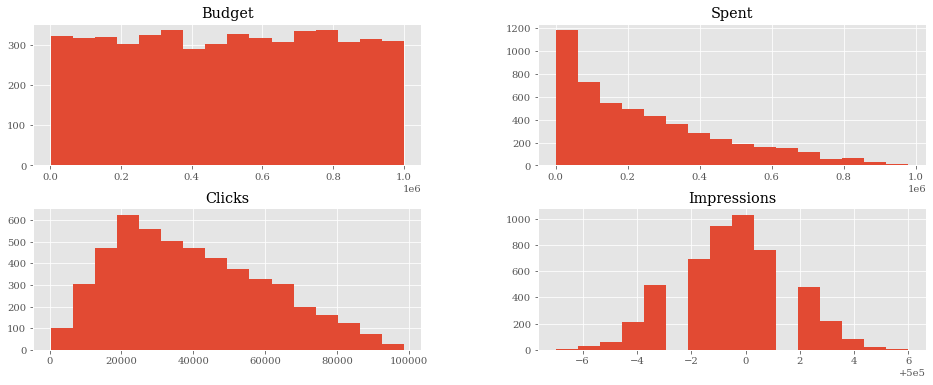

In [72]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=16, figsize=(16, 6));

#Group 12: Issue 1: Budget not showing

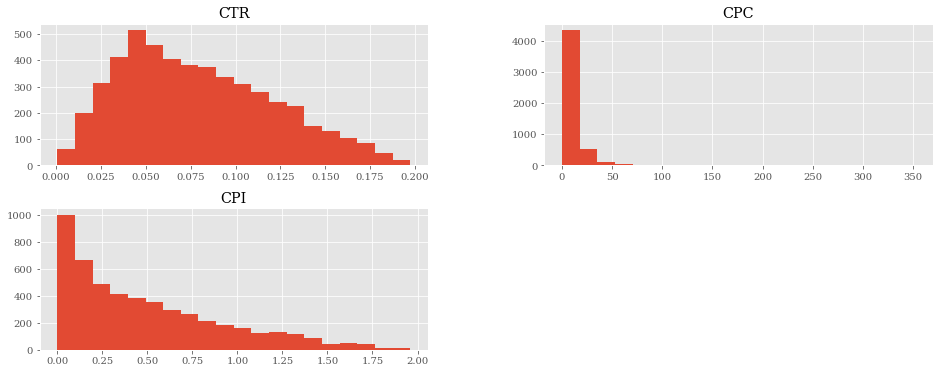

In [73]:
df[['CTR', 'CPC', 'CPI']].hist(
    bins=20, figsize=(16, 6));

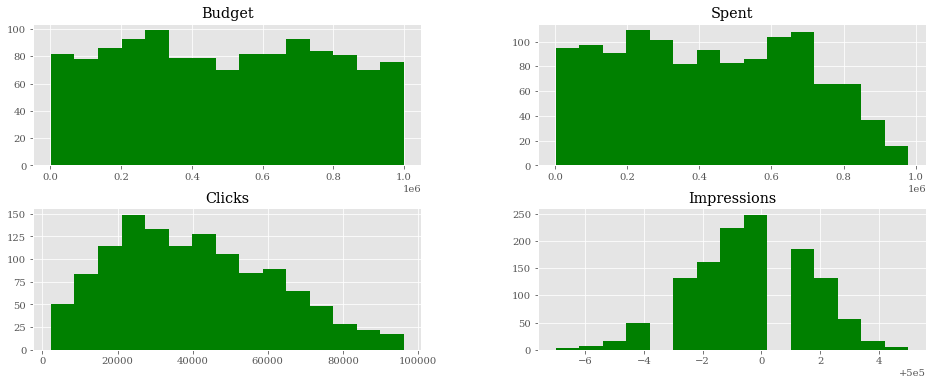

In [74]:
#Group 12: Issue 1: Type error here, budget not showing
# let's see the campaigns whose spent is > than 75% of the budget


mask = (df.Spent > 0.75 * df.Budget)
df[mask][['Budget', 'Spent', 'Clicks', 'Impressions']].hist(
    bins=15, figsize=(16, 6), color='g');

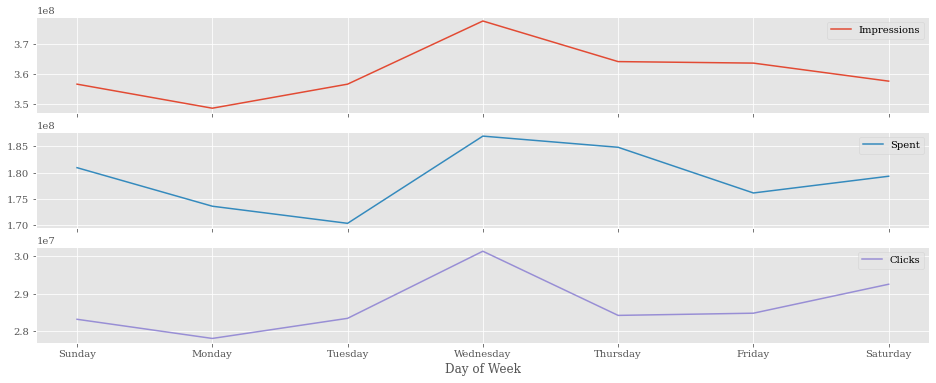

In [83]:
# Let's aggregate per Day of the Week
#Group 12: Issue 4: Days of week out of order, reindexed using a list of days in order

days = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

df_weekday = df.groupby(['Day of Week']).sum().reindex(days)
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
    figsize=(16, 6), subplots=True);

In [76]:
#Group 12: Issue 3 error here
# Let's aggregate per gender
agg_config = {
    'Impressions': ['mean', 'std'],
    'Spent': ['mean', 'std'],
}

df.groupby(['Target Gender', 'Target Age']).agg(agg_config)


Impressions                    Spent  \
                                   mean       std           mean   
Target Gender Target Age                                           
B             20-25       500000.040541  2.198625  286450.729730   
              20-30       499999.589041  1.862164  291382.972603   
              20-35       499999.472527  2.029453  247052.912088   
              20-40       499999.818182  1.998205  248132.870130   
              20-45       499999.789474  1.781976  241645.684211   
...                                 ...       ...            ...   
M             45-50       499999.823529  2.157409  323843.647059   
              45-55       499999.653846  1.917129  207864.807692   
              45-60       499999.062500  2.351418  218667.750000   
              45-65       499999.625000  1.087811  160619.375000   
              45-70       499998.200000  2.167948  143855.200000   

                                         
                                    std  
Target Gender Target Age                 
B             20-25       235010.391336  
              20-30       241650.507117  
              20-35       221756.166202  
              20-40       230482.396325  
              20-45       108371.521501  
...                                 ...  
M             45-50       216571.016917  
              45-55       190516.141831  
              45-60       218550.496021  
              45-65       170196.618360  
              45-70        66344.462864  

[90 rows x 4 columns]

In [80]:
# finally, let's make a pivot table

#GROUP 12: This is a pivot table with all numbers added together
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)

pivot



Clicks                   Impressions                      \
Target Gender        B        F        M           B         F         M   
Target Age                                                                 
20-25          2851872  2570762  4227106    37000003  30999962  51499950   
20-30          2889169  2641864  3964293    36499970  31499968  46999963   
20-35          3645552  2965593  2745135    45499952  34499976  37999963   
20-40          3180992  2523496  3022539    38499986  37499949  40499977   
20-45           839546   609289   694320     9499996   7499992   8999999   
25-30          2583277  3515836  3420792    34999961  43499940  43499955   
25-35          2698663  3381712  3594209    33499985  41999923  43999936   
25-40          2500362  2467075  3106844    31499982  30999970  35499973   
25-45          3326312  2907895  3099875    44499961  39999950  35999954   
25-50           546042   400053   730283     6499996   6000008   9999996   
30-35          2659394  2817048  3997735    34499966  34499978  53499943   
30-40          2673328  2635632  2533391    33999981  32999968  32499939   
30-45          2100904  3215692  3956973    31999966  40999978  51999960   
30-50          3502477  2975306  3285428    41499956  36499951  44999933   
30-55           733142   569741   615977     7499984   7999998   7999985   
35-40          2807668  2447146  3163702    31999942  31499995  39499932   
35-45          3176082  3243175  3310817    40999985  38499980  39999926   
35-50          2761452  3263297  3608007    34999965  36499969  42999951   
35-55          3278124  3188430  3444362    39999970  39999958  40499977   
35-60           699970   210395   400389     9499989   5000003   4499994   
40-45          2806504  2774949  3746031    35999995  35999953  43499975   
40-50          2706625  2350309  3232920    36999980  30499971  40999992   
40-55          3155682  3175471  2719924    36499977  39499972  35499970   
40-60          3279660  3100602  2981436    40499951  36999968  36999954   
40-65           687679   460611   474238     6499989   4500004   8000001   
45-50           708985   610317   493826     9000004   7999971   8499997   
45-55           450508   676946  1003570     5000002   7499972  12999991   
45-60           547030   594704   598169     7499988   6999999   7999985   
45-65           741523   666973   627275    10499999  10000002   7999994   
45-70           151445   114545   204868     1500004   1499999   2499991   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          21197354  19442685  25656084  
20-30          21270957  17869188  22165757  
20-35          22481815  15638580  19851687  
20-40          19106231  17057772  20220127  
20-45           4591268   3443698   5145306  
25-30          15555435  19999938  25883289  
25-35          15689663  20702451  23805934  
25-40          14373945  16114865  17073119  
25-45          17684205  22396168  17363639  
25-50           2946434   2047692   5567401  
30-35          18306121  13030722  28063459  
30-40          17550011  17316279  17926732  
30-45          16217766  20023657  27939019  
30-50          18987032  20599592  22066884  
30-55           3714498   2421767   2918521  
35-40          13217254  17651820  19186773  
35-45          21661812  19176190  15976062  
35-50          16921195  14249307  21101420  
35-55          18449844  23323831  20694820  
35-60           5801991   2254780   3269382  
40-45          17700511  15506934  23896065  
40-50          19992528  15725411  22135228  
40-55          16506168  20999173  14690441  
40-60          22669160  16702159  16752669  
40-65           2479172   1367225   4060429  
45-50           5248453   2706531   5505342  
45-55           2098552   3568081   5404485  
45-60           3847793   1978683   3498684  
45-65           4671213   5520774   2569910  
45-70            775269    263227  

In [81]:

#GROUP 12: Pivot table with the mean of all the numbers. Can be changed to min, max and std as well
pivot = df.pivot_table(
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.std
)

pivot


Clicks                             Impressions            \
Target Gender             B             F             M           B         F   
Target Age                                                                      
20-25          22355.791166  21220.955720  22336.727768    2.198625  2.091002   
20-30          22016.694584  21735.071245  23274.185311    1.862164  1.848042   
20-35          20803.554998  21415.553706  23788.213327    2.029453  1.805434   
20-40          20391.598482  18690.819596  19747.728665    1.998205  2.230986   
20-45          19761.532605  26545.892021  25597.794783    1.781976  1.767430   
25-30          20682.949035  21492.114033  21887.945274    2.040430  1.930841   
25-35          21050.484209  21584.402423  20478.214565    1.998643  1.921397   
25-40          22342.442133  21847.344753  20344.298966    2.082404  2.054519   
25-45          22490.502169  20145.727389  23225.379588    1.924454  1.964076   
25-50          23625.918374  19207.249816  17946.998665    2.015962  2.424621   
30-35          22424.190821  23293.986453  19783.417672    1.982446  2.172642   
30-40          21669.491874  22802.170180  21057.315609    2.238374  1.955209   
30-45          19023.601905  19824.995424  21164.250303    1.859926  1.911943   
30-50          22351.730003  22746.691378  22280.652245    2.056147  2.027963   
30-55          18410.392810  18244.586179  20891.065685    1.751190  2.334524   
35-40          22489.835895  20836.939129  19117.250117    1.916667  2.050190   
35-45          20421.345180  23397.478041  21321.648710    2.108935  1.802065   
35-50          18220.675647  21676.379623  22156.746357    1.939296  1.840273   
35-55          20248.775185  20342.409209  19708.963898    2.189590  2.158146   
35-60          18873.492715  10548.883693  25066.567406    2.410988  2.002776   
40-45          22453.175105  20689.202936  20544.617650    2.253800  2.070311   
40-50          21438.505914  20234.651554  22423.956875    2.002035  2.328136   
40-55          21036.596433  19759.675678  22254.515478    2.107373  1.935087   
40-60          18043.274828  21891.683864  19362.824691    2.311271  1.972976   
40-65          26131.389023  25793.489653  14513.290731    1.951331  2.006932   
45-50          23566.190554  15037.307668  19146.365204    2.624669  2.613267   
45-55          23282.475822  22250.357507  22839.926495    1.032796  1.505545   
45-60          25535.102648  24837.961696  20455.926606    2.210365  1.940035   
45-65          21211.310392  17804.380597  17699.518346    2.578298  2.468752   
45-70          10143.943037   9680.186999  19246.756890    0.577350  1.154701   

                                 Spent                                
Target Gender         M              B              F              M  
Target Age                                                            
20-25          2.113746  235010.391336  236437.629657  223179.520438  
20-30          1.754981  241650.507117  232867.224757  201306.103245  
20-35          1.996620  221756.166202  212694.700220  201662.698390  
20-40          1.762346  230482.396325  196138.257765  224089.503999  
20-45          2.261499  108371.521501  209904.757985  229550.066097  
25-30          1.737829  190665.912084  201430.895493  234722.312141  
25-35          1.740176  194003.554198  212044.912482  226082.402107  
25-40          2.276377  171854.984614  225328.147844  221318.623043  
25-45          1.778633  210945.299313  254188.560211  215995.121145  
25-50          1.361114  255030.585962  159442.420168  257108.267013  
30-35          2.080084  240602.778671  176452.912099  207883.513525  
30-40          2.075730  237695.934645  201287.753690  252632.215743  
30-45          2.006338  229406.691030  234395.035106  236124.205731  
30-50          2.112356  210977.299352  246443.695790  202276.008350  
30-55          2.048373  284908.888312  120685.439855  194213.363104  
35-40          1.978955  188634.446167  241901.274507  206870.139130 